<a href="https://colab.research.google.com/github/minhaz1172/Machine-Learning/blob/main/KNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (KNN) Classifier

K-Nearest Neighbors (KNN) is a **supervised learning algorithm** used for classification and regression tasks. It is an instance-based learning method where the data is used directly to make predictions without an explicit training phase.

## How It Works
1. The model is trained using labeled data points, each associated with a specific class.
2. To classify a new data point:
   - Calculate the distance between the new point and all existing data points (commonly using Euclidean distance).
   - Select the 'K' nearest data points.
   - The class that appears most frequently among the K nearest neighbors is assigned to the new data point.

## Key Features
- Non-parametric (makes no assumptions about the data distribution).
- Lazy learning (no explicit training phase).
- Easy to understand and implement.



# Import necessary Liabraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Customer Segmentation using K-Nearest Neighbors (KNN)

## About the Dataset

Imagine a telecommunications provider has segmented its customer base based on **service usage patterns**, categorizing the customers into four groups. The key question is whether **demographic data** can be used to predict group membership. If so, the company can tailor offers to individual prospective customers.

This is a **classification problem**. The dataset contains predefined labels, and the task is to build a model that can predict the class of a new, unseen customer.

### Features
The example focuses on using **demographic data**:
- Region
- Age
- Marital Status
- (Other possible demographic features)

### Target Variable: `custcat`
The `custcat` field has four possible classes:
- **1 - Basic Service**
- **2 - E-Service**
- **3 - Plus Service**
- **4 - Total Service**

Our goal is to build a **K-Nearest Neighbors (KNN) classifier** that can predict the class of unknown customers based on their demographic data.

---

## Problem Statement

Given a dataset with demographic features and known customer segments, **build a KNN classification model** to predict which customer segment a new customer will likely belong to.

---

## Objective
- To predict customer service usage patterns using demographic features.
- To help the telecommunications company **personalize offers and services** for prospective customers.

---

## Why KNN?
KNN is a simple yet powerful classification algorithm. It predicts the class of a new data point based on the majority class among its 'K' nearest neighbors in the feature space.

---

## Key Steps in the Project
1. **Load and explore the dataset**
2. **Preprocess the data**
3. **Split the data into training and testing sets**
4. **Build and train the KNN classifier**
5. **Evaluate the model performance**
6. **Tune the value of 'K' for optimal results**

---




In [4]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv")
df.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


# data Visualization and Visualization

In [6]:
df['custcat'].value_counts()

,count
custcat,
3,281
1,266
4,236
2,217


# visualize the correlation map of the data set to determine how the different features are related to each other.

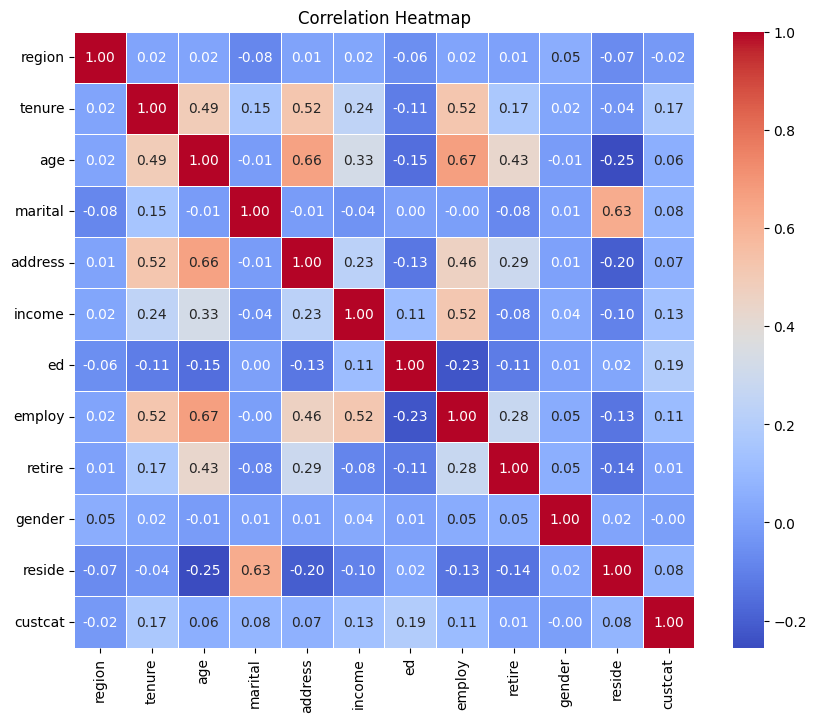

In [7]:
import seaborn as sns
correlation_matrix=df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# visualize a hist plots

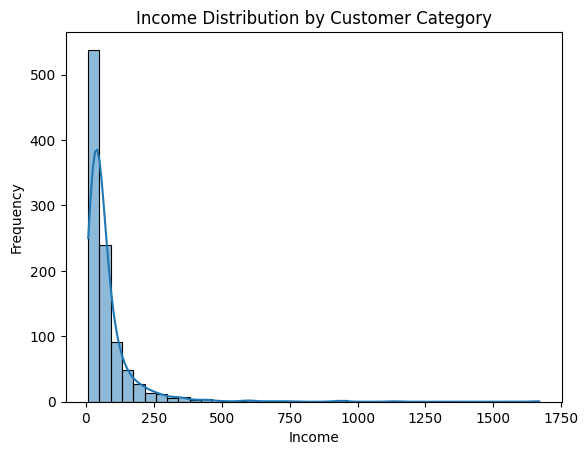

In [14]:
sns.histplot(data=df, x='income', kde=True,bins=40)
plt.title('Income Distribution by Customer Category')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Separates Features and Targets

In [15]:
X=df.drop('custcat',axis=1)
y=df['custcat']

In [16]:
X.shape

(1000, 11)

# Normalize the data

In [17]:
X=preprocessing.StandardScaler().fit_transform(X)
X


array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

# Split the dataset

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 11), (200, 11))